In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Import Data
df_Visitors = pd.read_csv('C:/Users/Steven Ma/Desktop/visitors.csv')
df_Quotes = pd.read_csv('C:/Users/Steven Ma/Desktop/quotes.csv')

In [3]:
# Take a look at each data set
df_Visitors.info()
print('')
df_Quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59996 entries, 0 to 59995
Data columns (total 8 columns):
session_date     59996 non-null object
device           59996 non-null object
category_name    59996 non-null object
sent_request     59996 non-null int64
request_id       34146 non-null float64
how_far          21451 non-null object
num_bedrooms     8638 non-null object
num_bathrooms    8638 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 3.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64330 entries, 0 to 64329
Data columns (total 5 columns):
request_id     64330 non-null int64
quote_id       64330 non-null int64
quote_price    31554 non-null float64
hired          64330 non-null int64
pro_id         64330 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.5 MB


In [4]:
# Change data type if necessary
df_Visitors['session_date'] = pd.to_datetime(df_Visitors['session_date'])

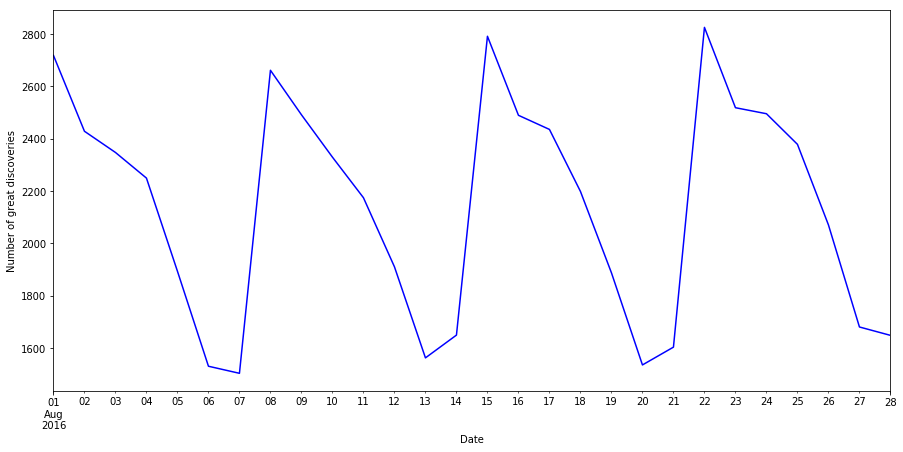

In [5]:
################################################################################################################################
###### Q1 => Visitors and Conversion Rate ######

# How does the number of visitors change over time?
df_Q1 = df_Visitors.set_index('session_date').resample('D')["device"].count()
#print(df_Q1)

ax_Q1 = df_Q1.plot(color='blue', figsize=(15,7))
ax_Q1.set_xlabel('Date')
ax_Q1.set_ylabel('Number of great discoveries')
plt.show()

In [6]:
# What percent of visitors submit a project request?
pct_submit_request = df_Visitors[df_Visitors['sent_request'] == 1].count() / df_Visitors['sent_request'].count()
print(np.round(pct_submit_request['sent_request'], 4))

0.5691


In [7]:
# How do category and device influence these metrics?
# Percentage by grand total
pivot_table_all = pd.pivot_table(df_Visitors, values='sent_request', index='device', columns='category_name', aggfunc='count')
print(np.round(pivot_table_all/59996, 4))
print()
# Percentage by sent_request = 1
pivot_table_submit_request = pd.pivot_table(df_Visitors[df_Visitors['sent_request'] == 1], values='sent_request', index='device', columns='category_name', aggfunc='count')
print(np.round(pivot_table_submit_request/59996, 4))

category_name  House Cleaning (One Time)  Local Moving (under 50 miles)
device                                                                 
desktop                           0.1381                         0.4002
mobile                            0.1510                         0.3107

category_name  House Cleaning (One Time)  Local Moving (under 50 miles)
device                                                                 
desktop                           0.0883                         0.2235
mobile                            0.0945                         0.1628


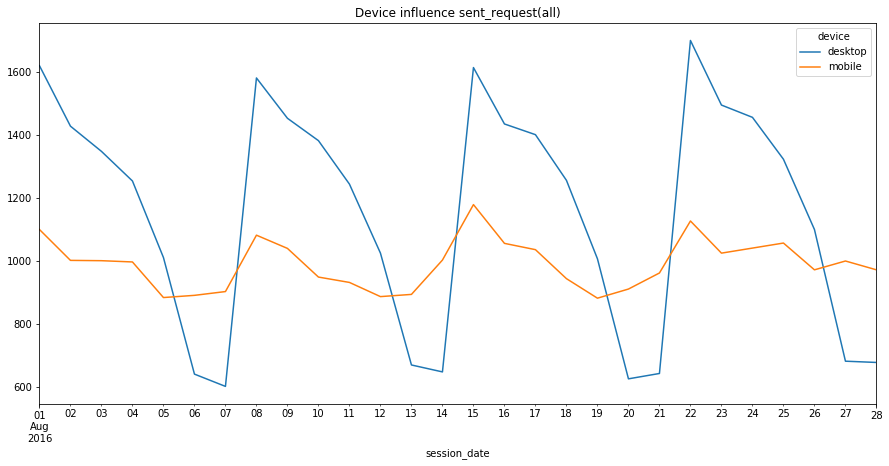

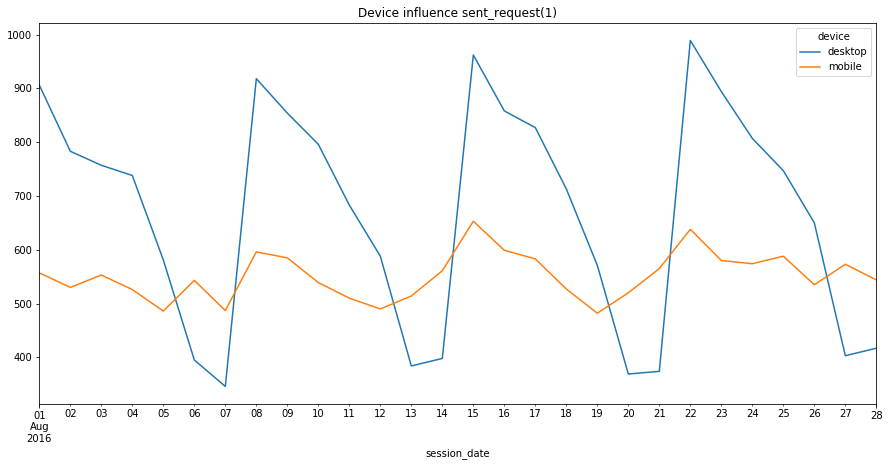

In [8]:
# Device influence sent_request(all) - time series plot
fig_dev, ax_dev = plt.subplots(figsize=(15,7))
df_Visitors.groupby(['session_date','device'])['sent_request'].count().unstack().plot(ax=ax_dev, title = 'Device influence sent_request(all)')
plt.show()

# Device influence sent_request(1) - time series plot
df_dev_1 = df_Visitors[df_Visitors['sent_request'] == 1]
fig_dev_1, ax_dev_1 = plt.subplots(figsize=(15,7))
df_dev_1.groupby(['session_date','device'])['sent_request'].count().unstack().plot(ax=ax_dev_1, title = 'Device influence sent_request(1)')
plt.show()

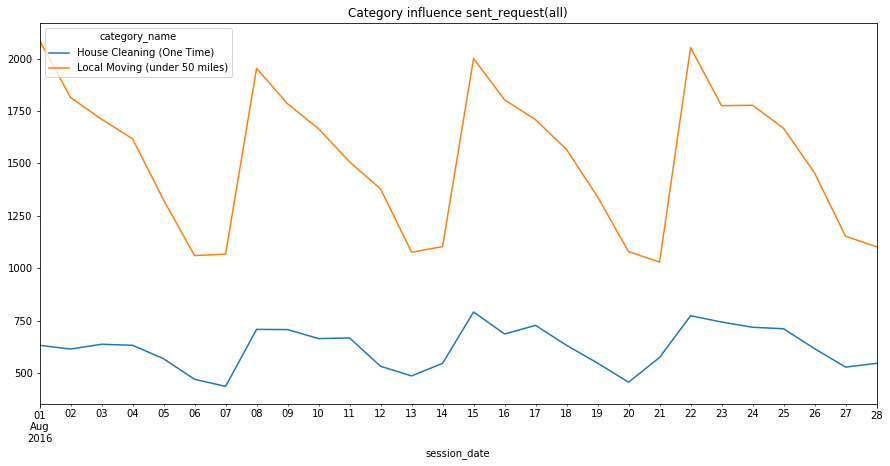

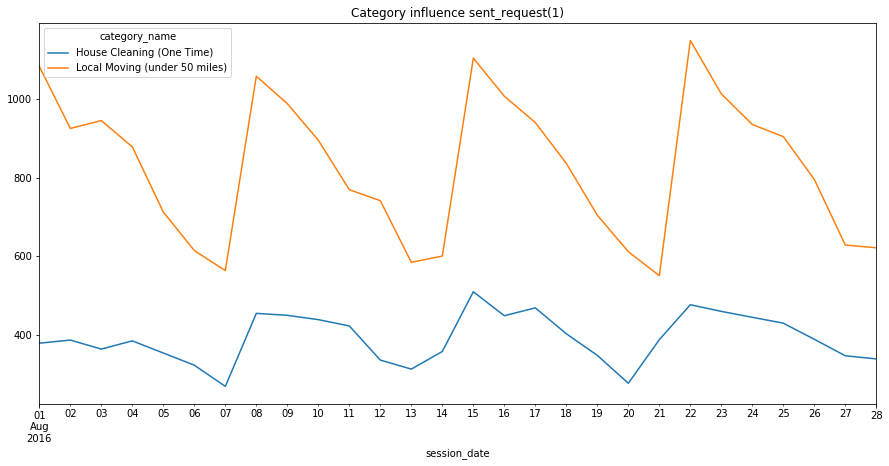

In [9]:
# Category influence sent_request(all) - time series plot
fig_cat, ax_cat = plt.subplots(figsize=(15,7))
df_Visitors.groupby(['session_date','category_name'])['sent_request'].count().unstack().plot(ax=ax_cat, title = 'Category influence sent_request(all)')
plt.show()

# Category influence sent_request(1) - time series plot
df_cat_1 = df_Visitors[df_Visitors['sent_request'] == 1]
fig_cat_1, ax_cat_1 = plt.subplots(figsize=(15,7))
df_cat_1.groupby(['session_date','category_name'])['sent_request'].count().unstack().plot(ax=ax_cat_1, title = 'Category influence sent_request(1)')
plt.show()

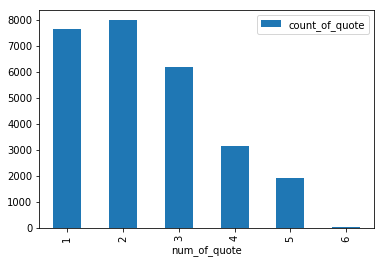

In [9]:
################################################################################################################################
###### Q2 => Quotes Per Request ######

# What is the distribution of number of quotes per request?
df_num_of_quote = pd.DataFrame(df_Quotes.groupby('request_id')['quote_id'].count())
df_num_of_quote.columns = ['num_of_quote'] # rename this column
df_num_of_quote.reset_index(level=0, inplace=True)

df_quote_dist = pd.DataFrame(df_num_of_quote.groupby('num_of_quote')['request_id'].count())
df_quote_dist.reset_index(level=0, inplace=True)
df_quote_dist.columns = ['num_of_quote', 'count_of_quote'] # rename this column
df_quote_dist.plot.bar(x='num_of_quote')
plt.show()

In [10]:
# What factors contribute to some requests getting more quotes than others?

df_Merge = pd.merge(df_Quotes, df_Visitors, how='left', on='request_id')

In [11]:
# For House Clean Category
df_HouseClean_quote_count = pd.DataFrame(df_Merge[df_Merge['category_name']=='House Cleaning (One Time)'].groupby(['request_id'])['quote_id'].count())
df_HouseClean_quote_count.reset_index(level=0, inplace=True)
df_HouseClean_quote_count.columns = ['request_id', 'quote_count'] # rename this column

df_HouseClean_unique_request = pd.merge(df_HouseClean_quote_count, df_Visitors, how='left', on='request_id')
df_HouseClean_unique_request = df_HouseClean_unique_request.drop(['session_date', 'device', 'sent_request', 'how_far'], axis=1)
df_HouseClean_unique_request.groupby(['num_bedrooms', 'num_bathrooms'])['quote_count'].describe()

count      mean       std  min   25%  50%   75%  \
num_bedrooms num_bathrooms                                                     
1 bedroom    1 bathroom      660.0  2.130303  1.118742  1.0  1.00  2.0  3.00   
             1.5 bathrooms    79.0  2.025316  1.061864  1.0  1.00  2.0  2.50   
             2 bathrooms      84.0  2.047619  1.240917  1.0  1.00  2.0  3.00   
             3 bathrooms       9.0  1.888889  1.269296  1.0  1.00  1.0  2.00   
2 bedrooms   1 bathroom      593.0  2.170320  1.169573  1.0  1.00  2.0  3.00   
             1.5 bathrooms   261.0  2.153257  1.122959  1.0  1.00  2.0  3.00   
             2 bathrooms     773.0  2.287193  1.189463  1.0  1.00  2.0  3.00   
             3 bathrooms     127.0  2.173228  1.099022  1.0  1.00  2.0  3.00   
             4+ bathrooms      3.0  1.666667  0.577350  1.0  1.50  2.0  2.00   
3 bedrooms   1 bathroom      295.0  2.179661  1.185912  1.0  1.00  2.0  3.00   
             1.5 bathrooms   299.0  2.214047  1.117735  1.0  1.00  2.0  3.00   
             2 bathrooms    1551.0  2.322373  1.178521  1.0  1.00  2.0  3.00   
             3 bathrooms     673.0  2.338782  1.191961  1.0  1.00  2.0  3.00   
             4+ bathrooms     47.0  2.255319  1.092824  1.0  1.00  2.0  3.00   
4 bedrooms   1 bathroom       39.0  1.794872  0.922796  1.0  1.00  1.0  3.00   
             1.5 bathrooms    54.0  2.333333  1.063990  1.0  2.00  2.0  3.00   
             2 bathrooms     497.0  2.336016  1.149058  1.0  1.00  2.0  3.00   
             3 bathrooms     741.0  2.341430  1.188127  1.0  1.00  2.0  3.00   
             4+ bathrooms    184.0  2.396739  1.210243  1.0  1.00  2.0  3.00   
5+ bedrooms  1 bathroom        5.0  2.800000  1.788854  1.0  1.00  3.0  4.00   
             1.5 bathrooms     6.0  2.166667  1.471960  1.0  1.25  2.0  2.00   
             2 bathrooms      65.0  2.200000  1.188486  1.0  1.00  2.0  3.00   
             3 bathrooms     167.0  2.341317  1.181037  1.0  1.00  2.0  3.00   
             4+ bathrooms    163.0  2.441718  1.242748  1.0  1.00  2.0  3.00   
Studio       1 bathroom      129.0  2.007752  1.042054  1.0  1.00  2.0  3.00   
             1.5 bathrooms     6.0  1.333333  0.816497  1.0  1.00  1.0  1.00   
             2 bathrooms       5.0  2.400000  0.547723  2.0  2.00  2.0  3.00   
             3 bathrooms       4.0  2.000000  0.816497  1.0  1.75  2.0  2.25   

                            max  
num_bedrooms num_bathrooms       
1 bedroom    1 bathroom     5.0  
             1.5 bathrooms  5.0  
             2 bathrooms    5.0  
             3 bathrooms    4.0  
2 bedrooms   1 bathroom     5.0  
             1.5 bathrooms  5.0  
             2 bathrooms    5.0  
             3 bathrooms    5.0  
             4+ bathrooms   2.0  
3 bedrooms   1 bathroom     5.0  
             1.5 bathrooms  5.0  
             2 bathrooms    5.0  
             3 bathrooms    5.0  
             4+ bathrooms   5.0  
4 bedrooms   1 bathroom     4.0  
             1.5 bathrooms  5.0  
             2 bathrooms    5.0  
             3 bathrooms    5.0  
             4+ bathrooms   5.0  
5+ bedrooms  1 bathroom     5.0  
             1.5 bathrooms  5.0  
             2 bathrooms    5.0  
             3 bathrooms    5.0  
             4+ bathrooms   5.0  
Studio       1 bathroom     5.0  
             1.5 bathrooms  3.0  
             2 bathrooms    3.0  
             3 bathrooms    3.0

In [12]:
# For Local Moving Category
df_LocalMove_quote_count = pd.DataFrame(df_Merge[df_Merge['category_name']=='Local Moving (under 50 miles)'].groupby(['request_id'])['quote_id'].count())
df_LocalMove_quote_count.reset_index(level=0, inplace=True)
df_LocalMove_quote_count.columns = ['request_id', 'quote_count'] # rename this column

df_LocalMove_unique_request = pd.merge(df_LocalMove_quote_count, df_Visitors, how='left', on='request_id')
df_LocalMove_unique_request = df_LocalMove_unique_request.drop(['session_date', 'device', 'sent_request', 'num_bedrooms', 'num_bathrooms'], axis=1)
df_LocalMove_unique_request.groupby(['how_far'])['quote_count'].describe()

,count,mean,std,min,25%,50%,75%,max
how_far,,,,,,,,
11 - 20 miles,3876.0,2.560630,1.263967,1.0,2.0,2.0,3.0,5.0
21 - 30 miles,2030.0,2.861576,1.254288,1.0,2.0,3.0,4.0,5.0
31 - 50 miles,1673.0,2.883443,1.281603,1.0,2.0,3.0,4.0,5.0
5 - 10 miles,4863.0,2.272466,1.164572,1.0,1.0,2.0,3.0,6.0
Less than 5 miles,5955.0,2.298573,1.166889,1.0,1.0,2.0,3.0,5.0
Within the same building,548.0,2.047445,1.046249,1.0,1.0,2.0,3.0,5.0


        quote_price
count  17187.000000
mean     151.982718
std      128.245166
min        0.000000
25%       99.000000
50%      140.000000
75%      185.000000
max     8500.000000
Skewness: 25.341338
Kurtosis: 1346.216394


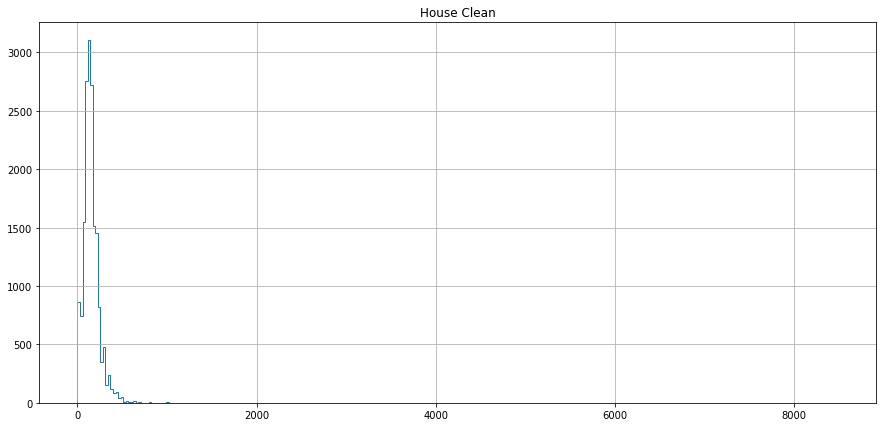

        quote_price  z_HouseClean
count  17121.000000  17121.000000
mean     148.517083      0.483495
std       83.618915      0.438302
min        0.000000      0.000135
25%       99.000000      0.179484
50%      139.000000      0.374429
75%      183.000000      0.678273
max      528.000000      2.932104
Skewness: 1.088204
Kurtosis: 2.060332


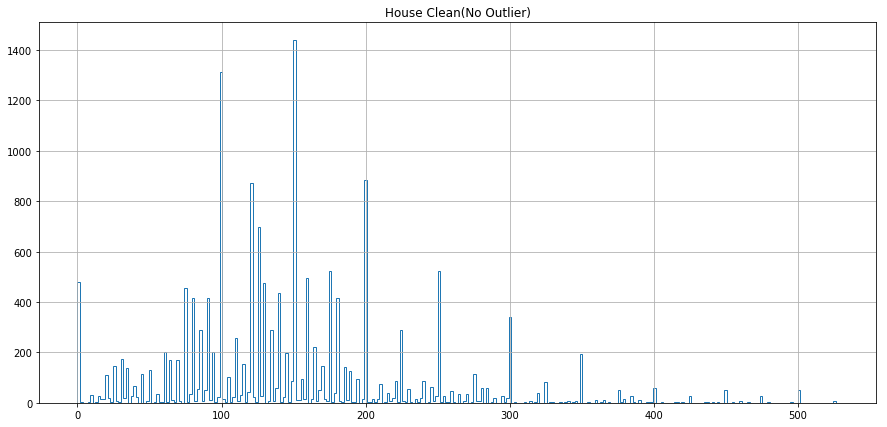

In [13]:
################################################################################################################################
###### Q3 => Job Value ######

# By category, what is the distribution of quote prices for a project?

# Join 2 tables on request_id and drop rows where quote_price is NA
df_Join = pd.merge(df_Quotes, df_Visitors, how='left', on='request_id').dropna(axis=0, subset=['quote_price']) 

# Explore the data for House Clean Category
df_Join_HouseClean = pd.DataFrame(df_Join[df_Join['category_name']=='House Cleaning (One Time)']['quote_price'])
print(df_Join_HouseClean.describe())
print("Skewness: %f" % df_Join_HouseClean['quote_price'].skew())
print("Kurtosis: %f" % df_Join_HouseClean['quote_price'].kurt())
df_Join_HouseClean.hist(column=['quote_price'], range = (df_Join_HouseClean['quote_price'].min(), df_Join_HouseClean['quote_price'].max()), histtype = 'step', figsize=(15,7), bins = 300)
plt.title('House Clean') # This time I use matplotlib package
plt.show()

# Remove outlier and explore again
df_Join_HouseClean['z_HouseClean'] = np.abs(stats.zscore(df_Join_HouseClean['quote_price']))
df_Join_HouseClean_z = df_Join_HouseClean[df_Join_HouseClean['z_HouseClean'] < 3]
print(df_Join_HouseClean_z.describe())
print("Skewness: %f" % df_Join_HouseClean_z['quote_price'].skew())
print("Kurtosis: %f" % df_Join_HouseClean_z['quote_price'].kurt())
df_Join_HouseClean_z.hist(column=['quote_price'], range = (df_Join_HouseClean_z['quote_price'].min(), df_Join_HouseClean_z['quote_price'].max()), histtype = 'step', figsize=(15,7), bins = 300)
plt.title('House Clean(No Outlier)') # This time I use matplotlib package
plt.show()

        quote_price
count  14367.000000
mean     350.821409
std      350.371081
min        0.000000
25%      250.000000
50%      351.000000
75%      400.000000
max    25504.000000
Skewness: 36.730109
Kurtosis: 2215.669659


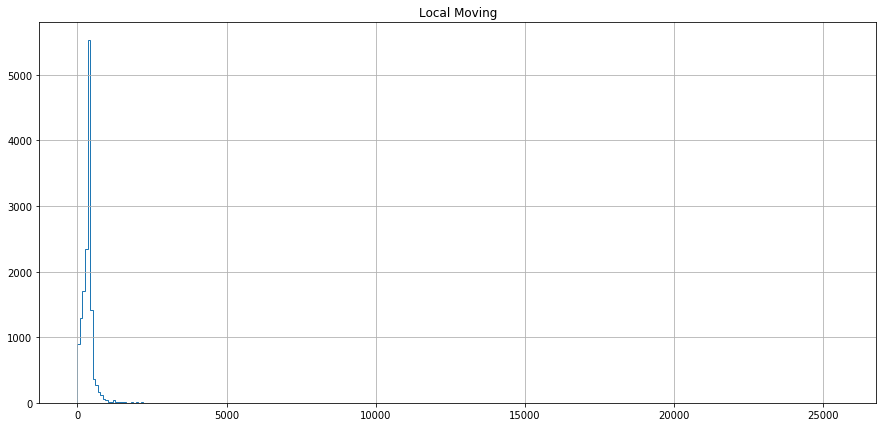

        quote_price  z_LocalMoving
count  14297.000000   14297.000000
mean     338.500261       0.325751
std      169.618427       0.359854
min        0.000000       0.000510
25%      250.000000       0.073700
50%      351.000000       0.197451
75%      400.000000       0.459019
max     1400.000000       2.994582
Skewness: 1.205716
Kurtosis: 5.417907


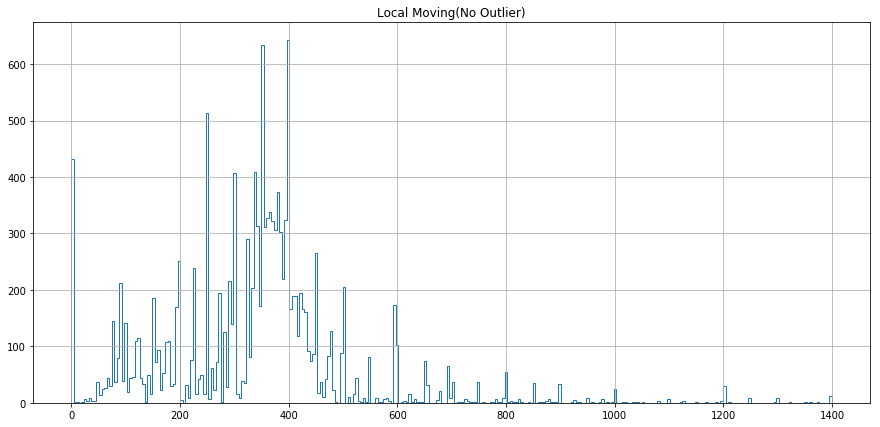

In [14]:
# Explore the data for Local Moving Category
df_Join_LocalMoving = pd.DataFrame(df_Join[df_Join['category_name']=='Local Moving (under 50 miles)']['quote_price'])
print(df_Join_LocalMoving.describe())
print("Skewness: %f" % df_Join_LocalMoving['quote_price'].skew())
print("Kurtosis: %f" % df_Join_LocalMoving['quote_price'].kurt())
df_Join_LocalMoving.hist(column=['quote_price'], range = (df_Join_LocalMoving['quote_price'].min(), df_Join_LocalMoving['quote_price'].max()), histtype = 'step', figsize=(15,7), bins = 300)
plt.title('Local Moving')
plt.show()

# Remove outlier and explore again
df_Join_LocalMoving['z_LocalMoving'] = np.abs(stats.zscore(df_Join_LocalMoving['quote_price']))
df_Join_LocalMoving_z = df_Join_LocalMoving[df_Join_LocalMoving['z_LocalMoving'] < 3]
print(df_Join_LocalMoving_z.describe())
print("Skewness: %f" % df_Join_LocalMoving_z['quote_price'].skew())
print("Kurtosis: %f" % df_Join_LocalMoving_z['quote_price'].kurt())
df_Join_LocalMoving_z.hist(column=['quote_price'], range = (df_Join_LocalMoving_z['quote_price'].min(), df_Join_LocalMoving_z['quote_price'].max()), histtype = 'step', figsize=(15,7), bins = 300)
plt.title('Local Moving(No Outlier)') # This time I use matplotlib package
plt.show()

In [15]:
# By category, what price do you think Thumbtack should charge pros to quote? Why?
# Explain your reasoning for any assumptions that you make.

df_Join_hire = df_Join[df_Join['hired']==1] # Selecting pros who are hired means the quote_price is accepted by request

C:\Users\Steven Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


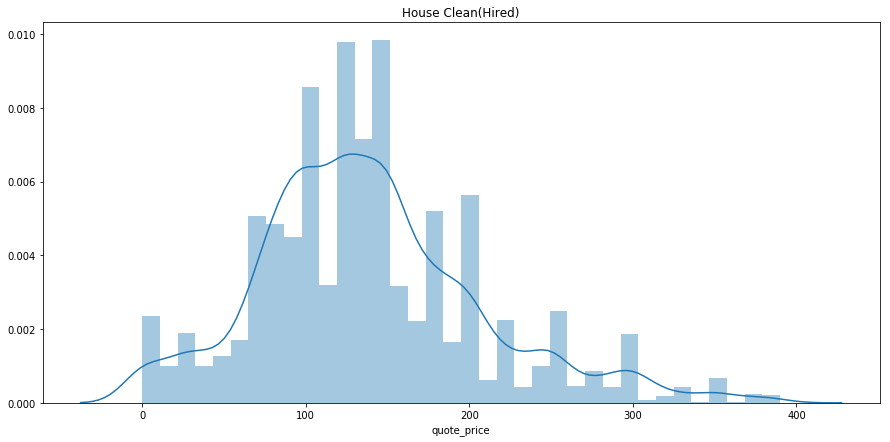

count        mean         std    min     25%  \
num_bedrooms num_bathrooms                                                 
1 bedroom    1 bathroom     276.0   97.651957   43.612781    0.0   74.25   
             1.5 bathrooms   33.0  103.575758   48.883810    1.0   75.00   
             2 bathrooms     31.0  104.838710   48.111050   20.0   75.00   
             3 bathrooms      3.0  158.333333   45.368859  110.0  137.50   
2 bedrooms   1 bathroom     238.0  111.475084   49.903474    0.0   80.00   
             1.5 bathrooms  110.0  119.574455   53.454098    0.0   91.25   
             2 bathrooms    336.0  124.061488   57.465468    0.0   90.00   
             3 bathrooms     54.0  123.925926   65.323535    0.0   86.25   
             4+ bathrooms     1.0  280.000000         NaN  280.0  280.00   
3 bedrooms   1 bathroom     109.0  124.743028   59.566847    0.0   98.00   
             1.5 bathrooms  119.0  144.235294   61.969471   25.0  100.00   
             2 bathrooms    643.0  140.855334   62.837296    0.0  100.00   
             3 bathrooms    308.0  157.686461   75.558929    0.0  115.00   
             4+ bathrooms    21.0  171.523333   77.343380    1.0  140.00   
4 bedrooms   1 bathroom      22.0  147.181818   61.033665   30.0  111.25   
             1.5 bathrooms   24.0  151.375000   84.825556    0.0  100.00   
             2 bathrooms    217.0  163.764931   74.899432    0.0  120.00   
             3 bathrooms    313.0  163.543450   73.936922    0.0  120.00   
             4+ bathrooms    76.0  162.736842   82.402325    0.0  125.00   
5+ bedrooms  1 bathroom       3.0  231.333333   90.610890  150.0  182.50   
             1.5 bathrooms    2.0  175.000000  141.421356   75.0  125.00   
             2 bathrooms     22.0  166.454545   86.242033   15.0  121.25   
             3 bathrooms     66.0  178.575758   89.228843    1.0  123.75   
             4+ bathrooms    63.0  192.777778   84.249140    1.0  150.00   
Studio       1 bathroom      52.0   85.961538   43.436662    0.0   58.75   
             1.5 bathrooms    3.0  135.000000   44.440972  100.0  110.00   
             2 bathrooms      2.0  100.000000    0.000000  100.0  100.00   

                              50%       75%    max  
num_bedrooms num_bathrooms                          
1 bedroom    1 bathroom      90.0  120.0000  300.0  
             1.5 bathrooms  100.0  139.0000  225.0  
             2 bathrooms    100.0  129.0000  249.0  
             3 bathrooms    165.0  182.5000  200.0  
2 bedrooms   1 bathroom     100.0  135.0000  325.0  
             1.5 bathrooms  112.5  150.0000  350.0  
             2 bathrooms    120.0  150.0000  350.0  
             3 bathrooms    117.5  150.0000  350.0  
             4+ bathrooms   280.0  280.0000  280.0  
3 bedrooms   1 bathroom     120.0  150.0000  325.0  
             1.5 bathrooms  140.0  175.0000  375.0  
             2 bathrooms    139.0  175.0000  385.0  
             3 bathrooms    150.0  199.9925  389.0  
             4+ bathrooms   175.0  225.0000  300.0  
4 bedrooms   1 bathroom     150.0  173.5000  325.0  
             1.5 bathrooms  142.5  185.0000  365.0  
             2 bathrooms    150.0  200.0000  350.0  
             3 bathrooms    150.0  200.0000  385.0  
             4+ bathrooms   160.0  200.0000  375.0  
5+ bedrooms  1 bathroom     215.0  272.0000  329.0  
             1.5 bathrooms  175.0  225.0000  275.0  
             2 bathrooms    160.0  223.5000  350.0  
             3 bathrooms    192.5  243.7500  390.0  
             4+ bathrooms   195.0  240.0000  350.0  
Studio       1 bathroom      80.0  100.0000  235.0  
             1.5 bathrooms  120.0  152.5000  185.0  
             2 bathrooms    100.0  100.0000  100.0

In [16]:
# Explore the data for House Clean Category
df_Join_HouseClean_hire = pd.DataFrame(df_Join_hire[df_Join['category_name']=='House Cleaning (One Time)'])

df_Join_HouseClean_hire['z_HouseClean'] = np.abs(stats.zscore(df_Join_HouseClean_hire['quote_price']))
df_Join_HouseClean_hire = df_Join_HouseClean_hire[df_Join_HouseClean_hire['z_HouseClean'] < 3]
fig_clean_hire, ax_clean_hire = plt.subplots(figsize=(15, 7))
sns.distplot(df_Join_HouseClean_hire['quote_price']) # This time I use seaborn package
ax_clean_hire.set_title('House Clean(Hired)')
plt.show()

group_HouseClean_hire = df_Join_HouseClean_hire.dropna(subset=['num_bedrooms', 'num_bathrooms']).groupby(['num_bedrooms', 'num_bathrooms'])['quote_price'].describe()
group_HouseClean_hire

C:\Users\Steven Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


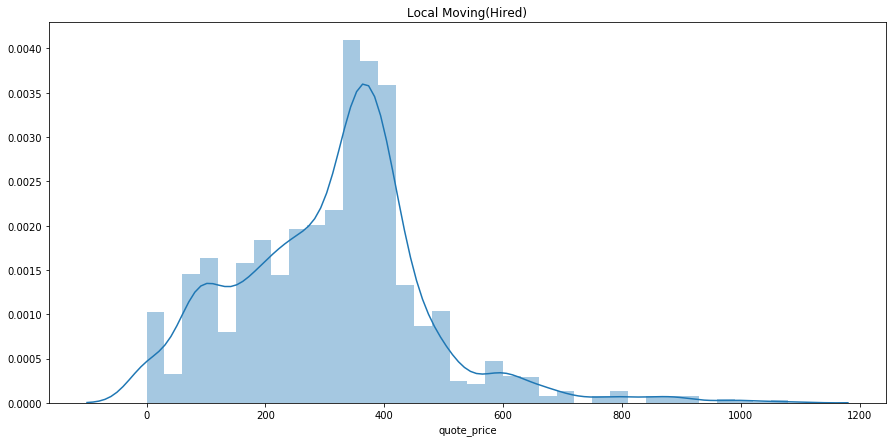

,count,mean,std,min,25%,50%,75%,max
how_far,,,,,,,,
11 - 20 miles,447.0,323.255034,145.678534,0.0,250.0,349.0,380.00,1080.0
21 - 30 miles,352.0,335.936080,128.356717,0.0,320.5,360.5,381.25,1039.0
31 - 50 miles,282.0,389.226950,136.103628,0.0,367.0,408.0,429.75,980.0
5 - 10 miles,420.0,294.135952,177.759806,0.0,172.5,282.5,396.00,980.0
Less than 5 miles,577.0,285.012132,164.604339,0.0,180.0,275.0,350.00,1080.0
Within the same building,48.0,224.646875,148.562775,0.0,125.0,207.5,306.25,650.0


In [17]:
# Explore the data for Local Moving Category
df_Join_LocalMoving_hire = pd.DataFrame(df_Join_hire[df_Join['category_name']=='Local Moving (under 50 miles)'])

df_Join_LocalMoving_hire['z_LocalMoving'] = np.abs(stats.zscore(df_Join_LocalMoving_hire['quote_price']))
df_Join_LocalMoving_hire = df_Join_LocalMoving_hire[df_Join_LocalMoving_hire['z_LocalMoving'] < 3]
fig_move_hire, ax_move_hire = plt.subplots(figsize=(15, 7))
sns.distplot(df_Join_LocalMoving_hire['quote_price'])
ax_move_hire.set_title('Local Moving(Hired)')
plt.show()

group_LocalMoving_hire = df_Join_LocalMoving_hire.dropna(subset=['how_far']).groupby(['how_far'])['quote_price'].describe()
group_LocalMoving_hire